In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import datetime
import os
from tueplots import bundles
from tueplots.constants.color import rgb
import sklearn as sk
from sklearn.decomposition import PCA
import seaborn as sns
import dload
import geopandas

#plt.rcParams.update(bundles.beamer_moml())
#plt.rcParams.update({"figure.dpi": 200})


In [56]:
accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding='WINDOWS-1252',low_memory=False)
drugs = pd.read_csv('FARS2021NationalCSV/drugs.csv',encoding='WINDOWS-1252',low_memory=False)
person = pd.read_csv('FARS2021NationalCSV/person.csv',encoding='WINDOWS-1252',low_memory=False)

In [57]:
col_labels = list(accidents.columns.values)
labels_to_keep = ['ST_CASE','STATE','STATENAME','COUNTY','COUNTYNAME','CITY','CITYNAME','MONTH','DAY','DAYNAME','DAY_WEEK','HOUR','LATITUDE','LONGITUD','WEATHER','LGT_COND' ]
drop_labels = [x for x in col_labels if x not in labels_to_keep]


In [58]:
accidents.drop(drop_labels,axis=1)


,STATE,STATENAME,ST_CASE,COUNTY,COUNTYNAME,CITY,CITYNAME,MONTH,DAY,DAYNAME,DAY_WEEK,HOUR,LATITUDE,LONGITUD,LGT_COND,WEATHER
0,1,Alabama,10001,115,ST. CLAIR (115),0,NOT APPLICABLE,2,12,12,6,22,33.601642,-86.312383,2,2
1,1,Alabama,10002,73,JEFFERSON (73),0,NOT APPLICABLE,2,11,11,5,18,33.541361,-86.643744,2,2
2,1,Alabama,10003,73,JEFFERSON (73),0,NOT APPLICABLE,2,7,7,1,0,33.419797,-86.752572,2,2
3,1,Alabama,10004,117,SHELBY (117),0,NOT APPLICABLE,2,3,3,4,16,33.360894,-86.777139,1,1
4,1,Alabama,10005,73,JEFFERSON (73),0,NOT APPLICABLE,1,30,30,7,22,33.815208,-86.825342,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,56,Wyoming,560100,19,JOHNSON (19),0,NOT APPLICABLE,11,27,27,7,9,44.183594,-106.622031,1,1
39504,56,Wyoming,560101,3,BIG HORN (3),0,NOT APPLICABLE,12,14,14,3,18,44.257797,-107.856219,2,1
39505,56,Wyoming,560102,37,SWEETWATER (37),0,NOT APPLICABLE,12,15,15,4,10,41.560719,-109.536278,1,1
39506,56,Wyoming,560103,21,LARAMIE (21),100,CHEYENNE,12,19,19,1,17,41.138878,-104.766653,2,1


In [59]:
drugs

,STATE,STATENAME,ST_CASE,VEH_NO,PER_NO,DRUGSPEC,DRUGSPECNAME,DRUGRES,DRUGRESNAME
0,1,Alabama,10001,1,1,1,Whole Blood,600,DELTA 9
1,1,Alabama,10001,1,2,0,Test Not Given,0,Test Not Given
2,1,Alabama,10001,2,1,1,Whole Blood,1,"Tested, No Drugs Found/Negative"
3,1,Alabama,10002,1,1,0,Test Not Given,0,Test Not Given
4,1,Alabama,10002,1,2,0,Test Not Given,0,Test Not Given
...,...,...,...,...,...,...,...,...,...
116157,56,Wyoming,560103,0,1,96,Not Reported,95,Not Reported
116158,56,Wyoming,560103,1,1,1,Whole Blood,1,"Tested, No Drugs Found/Negative"
116159,56,Wyoming,560104,1,1,1,Whole Blood,417,METHAMPHETAMINE
116160,56,Wyoming,560104,1,1,1,Whole Blood,695,"Cannabinoid, Type Unknown"


In [60]:
person

,STATE,STATENAME,ST_CASE,VEH_NO,PER_NO,VE_FORMS,COUNTY,MONTH,MONTHNAME,DAY,...,EMER_USE,EMER_USENAME,ROLLOVER,ROLLOVERNAME,IMPACT1,IMPACT1NAME,FIRE_EXP,FIRE_EXPNAME,MAK_MOD,MAK_MODNAME
0,1,Alabama,10001,1,1,2,115,2,February,12,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,2407.0,Jeep / Kaiser-Jeep / Willys- Jeep Patriot
1,1,Alabama,10001,1,2,2,115,2,February,12,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,2407.0,Jeep / Kaiser-Jeep / Willys- Jeep Patriot
2,1,Alabama,10001,2,1,2,115,2,February,12,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,51404.0,Volvo XC60 (For 2019 on. For model years 2008...
3,1,Alabama,10002,1,1,1,73,2,February,11,...,0.0,Not Applicable,0.0,No Rollover,11.0,11 Clock Point,0.0,No or Not Reported,59031.0,Lexus ES-250/300/300h/330/ 350
4,1,Alabama,10002,1,2,1,73,2,February,11,...,0.0,Not Applicable,0.0,No Rollover,11.0,11 Clock Point,0.0,No or Not Reported,59031.0,Lexus ES-250/300/300h/330/ 350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96742,56,Wyoming,560102,1,1,1,37,12,December,15,...,0.0,Not Applicable,1.0,"Rollover, Tripped by Object/Vehicle",0.0,Non-Collision,0.0,No or Not Reported,82881.0,Freightliner Medium/Heavy - CBE
96743,56,Wyoming,560103,0,1,1,21,12,December,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96744,56,Wyoming,560103,1,1,1,21,12,December,19,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,34401.0,"BMW X5 (For 2000-16. For 2017 on, see model 4..."
96745,56,Wyoming,560104,1,1,2,23,12,December,20,...,0.0,Not Applicable,0.0,No Rollover,12.0,12 Clock Point,0.0,No or Not Reported,48034.0,Subaru Legacy/Outback(prior to 2003 only; see ...


In [79]:
per_col_labels = list(person.columns.values)
per_labels_to_keep = ['PER_TYP','ST_CASE','AGE','ALC_RES','DRUGS']
per_drop_labels = [x for x in per_col_labels if x not in per_labels_to_keep]
perN = person.drop(per_drop_labels, axis=1)

In [80]:
perN = perN.loc[perN['PER_TYP']==1]

In [81]:
perN

,ST_CASE,AGE,PER_TYP,ALC_RES,DRUGS
0,10001,31,1,0,8
2,10001,25,1,0,0
3,10002,34,1,996,0
6,10003,18,1,996,9
7,10004,32,1,0,9
...,...,...,...,...,...
96741,560101,41,1,995,0
96742,560102,61,1,0,0
96744,560103,32,1,0,0
96745,560104,58,1,0,1


In [85]:
ages = perN['AGE'].to_list()
alc = perN['ALC_RES'].to_list()

In [87]:
type(ages)
type(alc)

list

In [96]:
while(max(ages) == 998):
    i = ages.index(998)
    ages.pop(i)
    alc.pop(i)

In [97]:
max(ages)

99

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

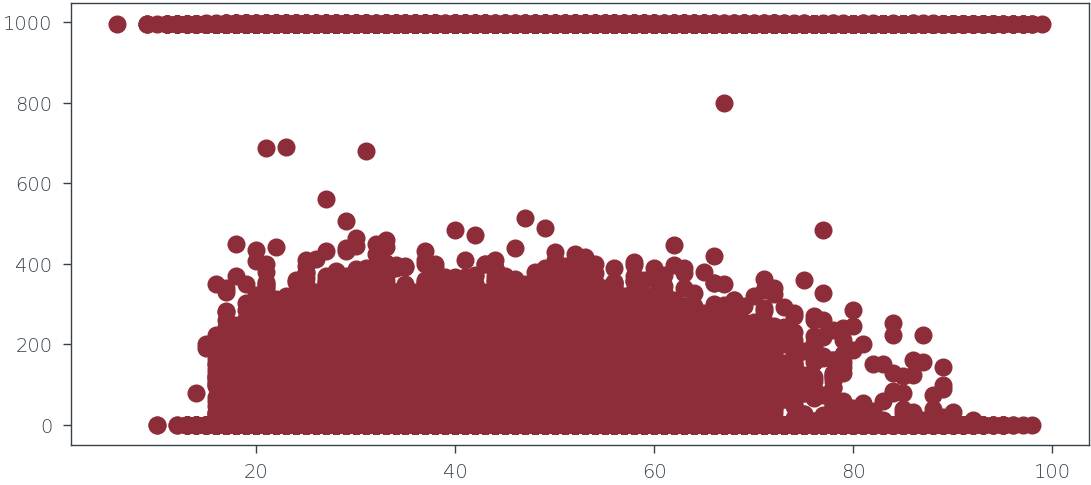

In [98]:
plt.scatter(ages,alc)